# Data Profiling - OTX Alient Vault - ip addresses

In [1]:
import datetime
import os
import time
import pandas as pd 
import requests
import urllib3
import json
import sys
import numpy as np

pd.options.display.max_colwidth = 1000
pd.set_option('display.max_columns', None)

In [2]:
file = r'C:\Users\leona\OneDrive\Desktop\Tesi\Pipeline\Datasets\Pipeline\DataCollection\OTXAlienVault\file_relativeTo_ip.csv'

In [3]:
df = pd.read_csv(file, low_memory = False )
df

,Unnamed: 0,datetime_int,hash,date,detections.avast,detections.avg,detections.clamav,detections.msdefender,ip address
0,0,1651061327,c13cce2e85db84a55e608527add7a9dc389694abd984cced400ee3d12b34b346,2022-04-27T12:08:47,Win32:PWSX-gen\ [Trj],NaN,Win.Malware.Bulz-9880537-0,NaN,176.186.13.236
1,0,1562928911,1a213a9f2bb0984f35bbf43ebc3e34a54fe1347b3130ec51bfd75bc29f93786d,2019-07-12T10:55:11,Win32:Malware-gen,NaN,Win.Ransomware.WannaCry-6313787-0,Ransom:Win32/CVE-2017-0147.A,223.8.200.190
2,0,1663696570,a2a0a4b91cbcf08126c70586521d2e7a0d6cf744058c314ffced7bdce97a40a1,2022-09-20T17:56:10,Win32:PWSX-gen\ [Trj],NaN,NaN,NaN,37.0.14.214
3,0,1694799713,eaa2a9653157f3e52a379616fcde0911decaf0f069d3ee3f6b31f2d6087afe58,2023-09-15T17:41:53,NaN,NaN,NaN,#LowFiCheckAVFolders,178.236.247.102
4,0,1696991992,d30d0f7ce6e737e09c188b5a3033f94876e9175417b002be02579fe83065ecb5,2023-10-11T02:39:52,NaN,NaN,Win.Malware.Uztuby-9848412-0,Backdoor:MSIL/Quasar.GG!MTB,74.141.196.43
...,...,...,...,...,...,...,...,...,...
1114,0,1695543513,2f411aee32eaff160d1be7cf3d8fbcd213770704172dca42d2e27b97bcbe16ca,2023-09-24T08:18:33,NaN,NaN,NaN,NaN,41.86.5.198
1115,0,1628845580,e364b3a5d68061977e17b548789190a4909ca5fbe87ca32a46beefcce367e3bb,2021-08-13T09:06:20,Win32:Trojan-gen,NaN,Win.Malware.Ursu-9854581-0,ALF:JASYP:TrojanWin32/Ymacco!atmnm,185.203.116.147
1116,0,1694770567,5189e968eb81dfb742d6e845b59cb20ec3007d12436fb5dabdbda78e1e49b598,2023-09-15T09:36:07,NaN,NaN,Win.Trojan.Darkkomet-6745294-0,VirTool:Win32/CeeInject.AJJ!bit,3.133.207.110
1117,0,1674811882,f50687084b8f8d0fc7a833a7eea363e1acf4f1812c5e9cb1e1d4293a519fdc39,2023-01-27T09:31:22,Win32:Trojan-gen,NaN,NaN,NaN,80.66.75.34


In [4]:

df = df.drop('Unnamed: 0', axis=1)
df

,datetime_int,hash,date,detections.avast,detections.avg,detections.clamav,detections.msdefender,ip address
0,1651061327,c13cce2e85db84a55e608527add7a9dc389694abd984cced400ee3d12b34b346,2022-04-27T12:08:47,Win32:PWSX-gen\ [Trj],NaN,Win.Malware.Bulz-9880537-0,NaN,176.186.13.236
1,1562928911,1a213a9f2bb0984f35bbf43ebc3e34a54fe1347b3130ec51bfd75bc29f93786d,2019-07-12T10:55:11,Win32:Malware-gen,NaN,Win.Ransomware.WannaCry-6313787-0,Ransom:Win32/CVE-2017-0147.A,223.8.200.190
2,1663696570,a2a0a4b91cbcf08126c70586521d2e7a0d6cf744058c314ffced7bdce97a40a1,2022-09-20T17:56:10,Win32:PWSX-gen\ [Trj],NaN,NaN,NaN,37.0.14.214
3,1694799713,eaa2a9653157f3e52a379616fcde0911decaf0f069d3ee3f6b31f2d6087afe58,2023-09-15T17:41:53,NaN,NaN,NaN,#LowFiCheckAVFolders,178.236.247.102
4,1696991992,d30d0f7ce6e737e09c188b5a3033f94876e9175417b002be02579fe83065ecb5,2023-10-11T02:39:52,NaN,NaN,Win.Malware.Uztuby-9848412-0,Backdoor:MSIL/Quasar.GG!MTB,74.141.196.43
...,...,...,...,...,...,...,...,...
1114,1695543513,2f411aee32eaff160d1be7cf3d8fbcd213770704172dca42d2e27b97bcbe16ca,2023-09-24T08:18:33,NaN,NaN,NaN,NaN,41.86.5.198
1115,1628845580,e364b3a5d68061977e17b548789190a4909ca5fbe87ca32a46beefcce367e3bb,2021-08-13T09:06:20,Win32:Trojan-gen,NaN,Win.Malware.Ursu-9854581-0,ALF:JASYP:TrojanWin32/Ymacco!atmnm,185.203.116.147
1116,1694770567,5189e968eb81dfb742d6e845b59cb20ec3007d12436fb5dabdbda78e1e49b598,2023-09-15T09:36:07,NaN,NaN,Win.Trojan.Darkkomet-6745294-0,VirTool:Win32/CeeInject.AJJ!bit,3.133.207.110
1117,1674811882,f50687084b8f8d0fc7a833a7eea363e1acf4f1812c5e9cb1e1d4293a519fdc39,2023-01-27T09:31:22,Win32:Trojan-gen,NaN,NaN,NaN,80.66.75.34


In [5]:
print("Duplicates: ",df.duplicated().any())
#total number of not null values
not_null_values = df.count().sum()
print("# not null values: ",not_null_values)
#total number of null values
null_values = df.isnull().sum().sum()
print("# null values: ",null_values)
#total number of cells
n_values = df.shape[0]*df.shape[1]
print("# values: ",n_values)
#we added to the set of missing values also 'na' and '--'
missing_values = ['na','--', 'NaN']
ds_property_nan = pd.read_csv(file, na_values = missing_values)
print("# missings: ",ds_property_nan.isnull().sum().sum())

Duplicates:  False
# not null values:  6298
# null values:  2654
# values:  8952
# missings:  2654


## Completeness

In [6]:
#COMPLETENESS evaluation
completeness = not_null_values / n_values
completeness = '{0:.1f}%'.format(completeness*100)
print(completeness)

70.4%


In [7]:
df


,datetime_int,hash,date,detections.avast,detections.avg,detections.clamav,detections.msdefender,ip address
0,1651061327,c13cce2e85db84a55e608527add7a9dc389694abd984cced400ee3d12b34b346,2022-04-27T12:08:47,Win32:PWSX-gen\ [Trj],NaN,Win.Malware.Bulz-9880537-0,NaN,176.186.13.236
1,1562928911,1a213a9f2bb0984f35bbf43ebc3e34a54fe1347b3130ec51bfd75bc29f93786d,2019-07-12T10:55:11,Win32:Malware-gen,NaN,Win.Ransomware.WannaCry-6313787-0,Ransom:Win32/CVE-2017-0147.A,223.8.200.190
2,1663696570,a2a0a4b91cbcf08126c70586521d2e7a0d6cf744058c314ffced7bdce97a40a1,2022-09-20T17:56:10,Win32:PWSX-gen\ [Trj],NaN,NaN,NaN,37.0.14.214
3,1694799713,eaa2a9653157f3e52a379616fcde0911decaf0f069d3ee3f6b31f2d6087afe58,2023-09-15T17:41:53,NaN,NaN,NaN,#LowFiCheckAVFolders,178.236.247.102
4,1696991992,d30d0f7ce6e737e09c188b5a3033f94876e9175417b002be02579fe83065ecb5,2023-10-11T02:39:52,NaN,NaN,Win.Malware.Uztuby-9848412-0,Backdoor:MSIL/Quasar.GG!MTB,74.141.196.43
...,...,...,...,...,...,...,...,...
1114,1695543513,2f411aee32eaff160d1be7cf3d8fbcd213770704172dca42d2e27b97bcbe16ca,2023-09-24T08:18:33,NaN,NaN,NaN,NaN,41.86.5.198
1115,1628845580,e364b3a5d68061977e17b548789190a4909ca5fbe87ca32a46beefcce367e3bb,2021-08-13T09:06:20,Win32:Trojan-gen,NaN,Win.Malware.Ursu-9854581-0,ALF:JASYP:TrojanWin32/Ymacco!atmnm,185.203.116.147
1116,1694770567,5189e968eb81dfb742d6e845b59cb20ec3007d12436fb5dabdbda78e1e49b598,2023-09-15T09:36:07,NaN,NaN,Win.Trojan.Darkkomet-6745294-0,VirTool:Win32/CeeInject.AJJ!bit,3.133.207.110
1117,1674811882,f50687084b8f8d0fc7a833a7eea363e1acf4f1812c5e9cb1e1d4293a519fdc39,2023-01-27T09:31:22,Win32:Trojan-gen,NaN,NaN,NaN,80.66.75.34


## Timeliness

In [13]:
from datetime import datetime

temp_columns = ['datetime_int']

df['datetime_int'] = pd.to_datetime(df['datetime_int'], unit='s')

df

,datetime_int,hash,date,detections.avast,detections.avg,detections.clamav,detections.msdefender,ip address
0,2022-04-27 12:08:47,c13cce2e85db84a55e608527add7a9dc389694abd984cced400ee3d12b34b346,2022-04-27T12:08:47,Win32:PWSX-gen\ [Trj],NaN,Win.Malware.Bulz-9880537-0,NaN,176.186.13.236
1,2019-07-12 10:55:11,1a213a9f2bb0984f35bbf43ebc3e34a54fe1347b3130ec51bfd75bc29f93786d,2019-07-12T10:55:11,Win32:Malware-gen,NaN,Win.Ransomware.WannaCry-6313787-0,Ransom:Win32/CVE-2017-0147.A,223.8.200.190
2,2022-09-20 17:56:10,a2a0a4b91cbcf08126c70586521d2e7a0d6cf744058c314ffced7bdce97a40a1,2022-09-20T17:56:10,Win32:PWSX-gen\ [Trj],NaN,NaN,NaN,37.0.14.214
3,2023-09-15 17:41:53,eaa2a9653157f3e52a379616fcde0911decaf0f069d3ee3f6b31f2d6087afe58,2023-09-15T17:41:53,NaN,NaN,NaN,#LowFiCheckAVFolders,178.236.247.102
4,2023-10-11 02:39:52,d30d0f7ce6e737e09c188b5a3033f94876e9175417b002be02579fe83065ecb5,2023-10-11T02:39:52,NaN,NaN,Win.Malware.Uztuby-9848412-0,Backdoor:MSIL/Quasar.GG!MTB,74.141.196.43
...,...,...,...,...,...,...,...,...
1114,2023-09-24 08:18:33,2f411aee32eaff160d1be7cf3d8fbcd213770704172dca42d2e27b97bcbe16ca,2023-09-24T08:18:33,NaN,NaN,NaN,NaN,41.86.5.198
1115,2021-08-13 09:06:20,e364b3a5d68061977e17b548789190a4909ca5fbe87ca32a46beefcce367e3bb,2021-08-13T09:06:20,Win32:Trojan-gen,NaN,Win.Malware.Ursu-9854581-0,ALF:JASYP:TrojanWin32/Ymacco!atmnm,185.203.116.147
1116,2023-09-15 09:36:07,5189e968eb81dfb742d6e845b59cb20ec3007d12436fb5dabdbda78e1e49b598,2023-09-15T09:36:07,NaN,NaN,Win.Trojan.Darkkomet-6745294-0,VirTool:Win32/CeeInject.AJJ!bit,3.133.207.110
1117,2023-01-27 09:31:22,f50687084b8f8d0fc7a833a7eea363e1acf4f1812c5e9cb1e1d4293a519fdc39,2023-01-27T09:31:22,Win32:Trojan-gen,NaN,NaN,NaN,80.66.75.34


In [17]:
dateparse = lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')
ds_property_t = df

volatility = 20
today = datetime(2023, 9, 15)
ds_property_t['currency'] = (today-ds_property_t['datetime_int']).dt.days

#adding a column with the timeliness computation
#if volatility is greater than currency the timeliness is equal to 1-currency/volatility, otherwise is 0
ds_property_t['Timeliness'] = np.where(volatility>ds_property_t['currency'],
                                       1-(ds_property_t['currency']/volatility),
                                       0)

print("Average Timeliness: ", ds_property_t['Timeliness'].mean())
print("Maximum Timeliness:", ds_property_t['Timeliness'].max())
print("Minimum Timeliness:", ds_property_t['Timeliness'].min())

Average Timeliness:  0.11751563896336015
Maximum Timeliness: 2.65
Minimum Timeliness: 0.0


# 10.1. Data Profiling - source OTX Alien Vault

In the single column analysis are analysed the following columns:
- 'datetime_int'
- 'hash'
- 'date'
- 'detections.avast'
- 'detections.avg'
- 'detections.clamav'
- 'detections.msdefender'
- 'ip address'

## Single column analysis

In [26]:
file = r'C:\Users\leona\OneDrive\Desktop\Tesi\Pipeline\Datasets\Pipeline\DataCollection\OTXAlienVault\file_relativeTo_ip.csv'

In [27]:
df = pd.read_csv(file, low_memory = False )
df

,Unnamed: 0,datetime_int,hash,date,detections.avast,detections.avg,detections.clamav,detections.msdefender,ip address
0,0,1651061327,c13cce2e85db84a55e608527add7a9dc389694abd984cced400ee3d12b34b346,2022-04-27T12:08:47,Win32:PWSX-gen\ [Trj],NaN,Win.Malware.Bulz-9880537-0,NaN,176.186.13.236
1,0,1562928911,1a213a9f2bb0984f35bbf43ebc3e34a54fe1347b3130ec51bfd75bc29f93786d,2019-07-12T10:55:11,Win32:Malware-gen,NaN,Win.Ransomware.WannaCry-6313787-0,Ransom:Win32/CVE-2017-0147.A,223.8.200.190
2,0,1663696570,a2a0a4b91cbcf08126c70586521d2e7a0d6cf744058c314ffced7bdce97a40a1,2022-09-20T17:56:10,Win32:PWSX-gen\ [Trj],NaN,NaN,NaN,37.0.14.214
3,0,1694799713,eaa2a9653157f3e52a379616fcde0911decaf0f069d3ee3f6b31f2d6087afe58,2023-09-15T17:41:53,NaN,NaN,NaN,#LowFiCheckAVFolders,178.236.247.102
4,0,1696991992,d30d0f7ce6e737e09c188b5a3033f94876e9175417b002be02579fe83065ecb5,2023-10-11T02:39:52,NaN,NaN,Win.Malware.Uztuby-9848412-0,Backdoor:MSIL/Quasar.GG!MTB,74.141.196.43
...,...,...,...,...,...,...,...,...,...
1114,0,1695543513,2f411aee32eaff160d1be7cf3d8fbcd213770704172dca42d2e27b97bcbe16ca,2023-09-24T08:18:33,NaN,NaN,NaN,NaN,41.86.5.198
1115,0,1628845580,e364b3a5d68061977e17b548789190a4909ca5fbe87ca32a46beefcce367e3bb,2021-08-13T09:06:20,Win32:Trojan-gen,NaN,Win.Malware.Ursu-9854581-0,ALF:JASYP:TrojanWin32/Ymacco!atmnm,185.203.116.147
1116,0,1694770567,5189e968eb81dfb742d6e845b59cb20ec3007d12436fb5dabdbda78e1e49b598,2023-09-15T09:36:07,NaN,NaN,Win.Trojan.Darkkomet-6745294-0,VirTool:Win32/CeeInject.AJJ!bit,3.133.207.110
1117,0,1674811882,f50687084b8f8d0fc7a833a7eea363e1acf4f1812c5e9cb1e1d4293a519fdc39,2023-01-27T09:31:22,Win32:Trojan-gen,NaN,NaN,NaN,80.66.75.34


In [28]:
df

,Unnamed: 0,datetime_int,hash,date,detections.avast,detections.avg,detections.clamav,detections.msdefender,ip address
0,0,1651061327,c13cce2e85db84a55e608527add7a9dc389694abd984cced400ee3d12b34b346,2022-04-27T12:08:47,Win32:PWSX-gen\ [Trj],NaN,Win.Malware.Bulz-9880537-0,NaN,176.186.13.236
1,0,1562928911,1a213a9f2bb0984f35bbf43ebc3e34a54fe1347b3130ec51bfd75bc29f93786d,2019-07-12T10:55:11,Win32:Malware-gen,NaN,Win.Ransomware.WannaCry-6313787-0,Ransom:Win32/CVE-2017-0147.A,223.8.200.190
2,0,1663696570,a2a0a4b91cbcf08126c70586521d2e7a0d6cf744058c314ffced7bdce97a40a1,2022-09-20T17:56:10,Win32:PWSX-gen\ [Trj],NaN,NaN,NaN,37.0.14.214
3,0,1694799713,eaa2a9653157f3e52a379616fcde0911decaf0f069d3ee3f6b31f2d6087afe58,2023-09-15T17:41:53,NaN,NaN,NaN,#LowFiCheckAVFolders,178.236.247.102
4,0,1696991992,d30d0f7ce6e737e09c188b5a3033f94876e9175417b002be02579fe83065ecb5,2023-10-11T02:39:52,NaN,NaN,Win.Malware.Uztuby-9848412-0,Backdoor:MSIL/Quasar.GG!MTB,74.141.196.43
...,...,...,...,...,...,...,...,...,...
1114,0,1695543513,2f411aee32eaff160d1be7cf3d8fbcd213770704172dca42d2e27b97bcbe16ca,2023-09-24T08:18:33,NaN,NaN,NaN,NaN,41.86.5.198
1115,0,1628845580,e364b3a5d68061977e17b548789190a4909ca5fbe87ca32a46beefcce367e3bb,2021-08-13T09:06:20,Win32:Trojan-gen,NaN,Win.Malware.Ursu-9854581-0,ALF:JASYP:TrojanWin32/Ymacco!atmnm,185.203.116.147
1116,0,1694770567,5189e968eb81dfb742d6e845b59cb20ec3007d12436fb5dabdbda78e1e49b598,2023-09-15T09:36:07,NaN,NaN,Win.Trojan.Darkkomet-6745294-0,VirTool:Win32/CeeInject.AJJ!bit,3.133.207.110
1117,0,1674811882,f50687084b8f8d0fc7a833a7eea363e1acf4f1812c5e9cb1e1d4293a519fdc39,2023-01-27T09:31:22,Win32:Trojan-gen,NaN,NaN,NaN,80.66.75.34


In [29]:
df = df.drop(['Unnamed: 0', 'date'], axis=1)
df['date'] = pd.to_datetime(df['datetime_int'], unit='s')
df = df.drop('datetime_int', axis=1)

df

,hash,detections.avast,detections.avg,detections.clamav,detections.msdefender,ip address,date
0,c13cce2e85db84a55e608527add7a9dc389694abd984cced400ee3d12b34b346,Win32:PWSX-gen\ [Trj],NaN,Win.Malware.Bulz-9880537-0,NaN,176.186.13.236,2022-04-27 12:08:47
1,1a213a9f2bb0984f35bbf43ebc3e34a54fe1347b3130ec51bfd75bc29f93786d,Win32:Malware-gen,NaN,Win.Ransomware.WannaCry-6313787-0,Ransom:Win32/CVE-2017-0147.A,223.8.200.190,2019-07-12 10:55:11
2,a2a0a4b91cbcf08126c70586521d2e7a0d6cf744058c314ffced7bdce97a40a1,Win32:PWSX-gen\ [Trj],NaN,NaN,NaN,37.0.14.214,2022-09-20 17:56:10
3,eaa2a9653157f3e52a379616fcde0911decaf0f069d3ee3f6b31f2d6087afe58,NaN,NaN,NaN,#LowFiCheckAVFolders,178.236.247.102,2023-09-15 17:41:53
4,d30d0f7ce6e737e09c188b5a3033f94876e9175417b002be02579fe83065ecb5,NaN,NaN,Win.Malware.Uztuby-9848412-0,Backdoor:MSIL/Quasar.GG!MTB,74.141.196.43,2023-10-11 02:39:52
...,...,...,...,...,...,...,...
1114,2f411aee32eaff160d1be7cf3d8fbcd213770704172dca42d2e27b97bcbe16ca,NaN,NaN,NaN,NaN,41.86.5.198,2023-09-24 08:18:33
1115,e364b3a5d68061977e17b548789190a4909ca5fbe87ca32a46beefcce367e3bb,Win32:Trojan-gen,NaN,Win.Malware.Ursu-9854581-0,ALF:JASYP:TrojanWin32/Ymacco!atmnm,185.203.116.147,2021-08-13 09:06:20
1116,5189e968eb81dfb742d6e845b59cb20ec3007d12436fb5dabdbda78e1e49b598,NaN,NaN,Win.Trojan.Darkkomet-6745294-0,VirTool:Win32/CeeInject.AJJ!bit,3.133.207.110,2023-09-15 09:36:07
1117,f50687084b8f8d0fc7a833a7eea363e1acf4f1812c5e9cb1e1d4293a519fdc39,Win32:Trojan-gen,NaN,NaN,NaN,80.66.75.34,2023-01-27 09:31:22


In [30]:
df.columns

Index(['hash', 'detections.avast', 'detections.avg', 'detections.clamav',
       'detections.msdefender', 'ip address', 'date'],
      dtype='object')

# Single column analysis

# 1 : hash

## CARDINALITIES

In [32]:
#len command counts the number of rows
n_rows = len(df['hash'])
print("# rows: ", n_rows)

# rows:  1119


In [33]:
#number of non—null observation in "ioc" column
count_values = df['hash'].count()
print("# non-null: ", n_rows)

# non-null:  1119


In [31]:
#value counts is the same of a group by (attribute "ibu")
df['hash'].value_counts()

ed8742871e865ecfab5a8315d7941c323f1dc2fead6d5cc9a95966e0c3ba940c    4
88f1be2700acce86d778f28868d1de174c5e7791b1a5958310ad6d159ceb97ce    3
fb76575455f834496b0c7dadb34855700d65ff26d7f38979c63d6867cecdaf89    3
49e7b71fcd7485085c6d6ee2b340d279b6172f9e36f7f8e2307dfa0547a603e3    3
ae6b89fda0ebe92b7ef43b457a6f7b9d23a51792e7327440ea76de0864951c5c    2
                                                                   ..
041b0cf4599d387da801239cd71b188bd3283df7eac2f9e5330c4d13ead1e71b    1
71c3f16a413ca4f539b17838e5afa8e75bfbed7a5267f458fb26309c3a190bb1    1
b15de477cfbeebb8bbdc45f252c7c6bc6d2897ab737240c78a82a618f6e85508    1
ec7c53df227b9548aac55f8c16b0f8b170e04c2d8219679f9a91adee9eb798cb    1
a29142fb8a255b89905a2c1f039a75169876aaac5b5a71ec49ccb88b1d3bac6e    1
Name: hash, Length: 1093, dtype: int64

## Cardinality

In [34]:
#nunique is the number of distict values for an attribute (attribute "ibu")
distinct_values = (df['hash'].nunique())
print("Cardinality: ", distinct_values)

Cardinality:  1093


## Uniqueness

In [35]:
#Uniqueness evaluation (attribute "ioc")
uniqueness = distinct_values / n_rows
print("Uniqueness: ", uniqueness)

Uniqueness:  0.9767649687220733


## Distinctness

In [36]:
#Distinctness evaluation (attribute "ioc")
distinctness = distinct_values / count_values
print("Distinctness: ", distinctness)

Distinctness:  0.9767649687220733


# 2 : ip_addresses


## CARDINALITIES


In [39]:
col = 'ip address'

In [40]:
n_rows = len(df[col])
print("# rows: ", n_rows)

# rows:  1119


In [41]:
count_values = df[col].count()
print("# non-null: ", n_rows)

# non-null:  1119


In [42]:
df[col].value_counts()

176.186.13.236    1
45.133.174.122    1
86.61.77.167      1
85.187.94.142     1
34.223.60.188     1
                 ..
5.2.68.75         1
5.187.49.231      1
162.206.16.208    1
103.143.29.28     1
107.148.8.176     1
Name: ip address, Length: 1119, dtype: int64

## Cardinality

In [43]:
distinct_values = (df[col].nunique())
print("Cardinality: ", distinct_values)

Cardinality:  1119


## Uniqueness

In [44]:
uniqueness = distinct_values / n_rows
print("Uniqueness: ", uniqueness)

Uniqueness:  1.0


## Distinctness

In [45]:
distinctness = distinct_values / count_values
print("Distinctness: ", distinctness)

Distinctness:  1.0


# Profiling Auto-report

In [46]:
sys.path.append("C:\\Users\\leona\\OneDrive\\Desktop\\Tesi\\Pipeline\\Report")

In [47]:
import pandas_profiling as pp

C:\Users\leona\AppData\Local\Temp\ipykernel_10872\1872674328.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
profile = pp.ProfileReport(df, title="OTX Alien Vault - IP Addresses - Pandas Profiling Report")
profile.to_file("OTX_Alien_Vault-IP_Addresses.html")

NameError: name 'ProfileReport' is not defined

## Value Distribution over time

In [62]:
import matplotlib.pyplot as plt

In [63]:
df = df.sort_values(by='date', ascending = True)

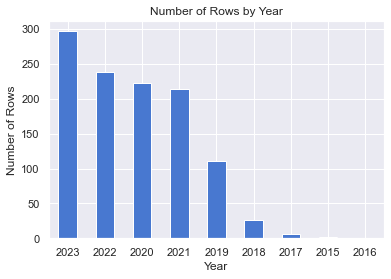

In [64]:
# Extract years from the 'date' column and create a histogram
years_histogram = df['date'].dt.year.value_counts()

# Plot the histogram
years_histogram.plot(kind='bar', xlabel='Year', ylabel='Number of Rows', title='Number of Rows by Year')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.show()